In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Model, Sequential
from keras.optimizers import Adam,SGD
from keras.layers import Conv2D, AveragePooling2D, Dropout, Flatten, Dense, Activation, Input
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(2)

In [13]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [14]:
X, y = np.load("X.npy"), np.load("Y.npy")

In [15]:
X = X.astype('float32') / 255

In [16]:
y = tf.keras.utils.to_categorical(y).astype('uint8')
print(X.shape,y.shape)

(293, 224, 224, 3) (293, 2)


In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True)
Xtrain, Xvalid, ytrain, yvalid = train_test_split(Xtrain,ytrain,test_size = 0.2,shuffle=True)
print("Train:",Xtrain.shape,ytrain.shape)
print("Validation:",Xvalid.shape,yvalid.shape)
print("Test:",Xtest.shape,ytest.shape)

Train: (187, 224, 224, 3) (187, 2)
Validation: (47, 224, 224, 3) (47, 2)
Test: (59, 224, 224, 3) (59, 2)


In [18]:
taille_filtre = (3,3)
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=taille_filtre,padding="same", activation='relu', input_shape=(Xtrain.shape[1],Xtrain.shape[2],3),name="Conv1"))
model.add(BatchNormalization())
model.add(AveragePooling2D())
model.add(Conv2D(filters=32,kernel_size=taille_filtre,padding="valid", activation='relu',name="Conv2"))
model.add(BatchNormalization())
model.add(AveragePooling2D())
model.add(Conv2D(filters=64,kernel_size=taille_filtre,padding="valid", activation='relu',name="Conv3"))
model.add(AveragePooling2D())
model.add(Conv2D(filters=128,kernel_size=taille_filtre,padding="valid", activation='relu',name="Conv4"))
model.add(Flatten())
model.add(Dense(124,activation='relu',name="Dense1"))
#model.add(Dense(32,activation='relu',name="Dense2"))
model.add(Dense(2,activation='sigmoid',name="output"))
model.summary()

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [49]:
train_datagen = ImageDataGenerator(rotation_range=20,width_shift_range=0.2,height_shift_range=0.3,horizontal_flip=True,vertical_flip=True,)
train_datagen.fit(Xtrain)

In [38]:
bs = 32
epoch = 15
opt = SGD(learning_rate=1e-3,momentum=0.8)
#opt = Adam()
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
train_generator = train_datagen.flow(Xtrain,ytrain)
history = model.fit(train_generator,
                    epochs = epoch,
                    verbose = 2,
                    validation_data = (Xvalid,yvalid),
                    steps_per_epoch = int(Xtrain.shape[0]/bs),
                    validation_steps = len(Xvalid)//bs)

Epoch 1/15
5/5 - 2s - loss: 0.6938 - accuracy: 0.5290 - val_loss: 0.6931 - val_accuracy: 0.4894
Epoch 2/15
5/5 - 2s - loss: 0.6874 - accuracy: 0.5742 - val_loss: 0.6931 - val_accuracy: 0.4894
Epoch 3/15
5/5 - 2s - loss: 0.6739 - accuracy: 0.5935 - val_loss: 0.6931 - val_accuracy: 0.4894
Epoch 4/15
5/5 - 1s - loss: 0.6691 - accuracy: 0.5813 - val_loss: 0.6931 - val_accuracy: 0.5106
Epoch 5/15
5/5 - 1s - loss: 0.6505 - accuracy: 0.7188 - val_loss: 0.6930 - val_accuracy: 0.5106
Epoch 6/15
5/5 - 1s - loss: 0.6230 - accuracy: 0.8750 - val_loss: 0.6929 - val_accuracy: 0.5106
Epoch 7/15
5/5 - 2s - loss: 0.5939 - accuracy: 0.8452 - val_loss: 0.6927 - val_accuracy: 0.5106
Epoch 8/15
5/5 - 1s - loss: 0.5545 - accuracy: 0.8516 - val_loss: 0.6926 - val_accuracy: 0.5106
Epoch 9/15
5/5 - 1s - loss: 0.5251 - accuracy: 0.8645 - val_loss: 0.6925 - val_accuracy: 0.5106
Epoch 10/15
5/5 - 1s - loss: 0.4651 - accuracy: 0.8938 - val_loss: 0.6924 - val_accuracy: 0.5106
Epoch 11/15
5/5 - 1s - loss: 0.3906 - a

In [39]:
test_loss, test_acc = model.evaluate(Xtest, ytest)
print("Test Loss:",test_loss," Test accuracy:",test_acc*100)

2/2 [==============================] - 0s 8ms/step - loss: 0.7091 - accuracy: 0.4576
Test Loss: 0.7090538144111633  Test accuracy: 45.76271176338196


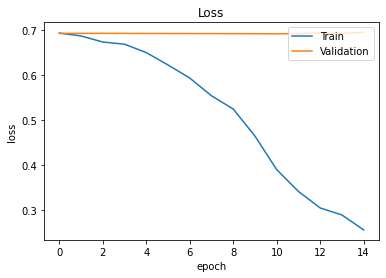

In [40]:
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

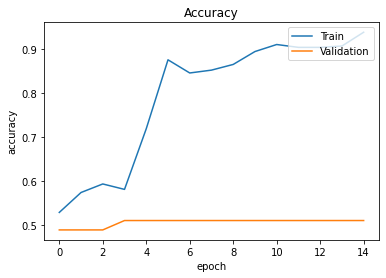

In [41]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()